In [1]:
# Import basic modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
from matplotlib import rcParams


# Standard scaler for preprocessing
from sklearn.preprocessing import StandardScaler

# Importing split  
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

plt.style.use('bmh')

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

#sns.set_style("whitegrid")
#sns.set_context("poster")

# Modeling
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection

In [2]:
 #Import the provincial data previously cleaned, explored, feature-engineered and... 
# ..stored as cleaned_train.csv

data= pd.read_csv('cleaned_train.csv')

In [3]:
data=data.drop('Unnamed: 0',axis=1)

In [4]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week,weekday,sales,item_name,item_category_id,first_sale_date,shop_name,city,item_category_name,major
0,2013-01-02,0,59,22154,999.0,1.0,2,1,2013,1,2,999.0,ЯВЛЕНИЕ 2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
1,2013-04-26,3,59,944,150.0,1.0,26,4,2013,17,4,150.0,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
2,2013-06-26,5,59,944,199.5,1.0,26,6,2013,26,2,199.5,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
3,2013-07-20,6,59,944,199.5,1.0,20,7,2013,29,5,199.5,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино
4,2013-09-14,8,59,944,299.0,2.0,14,9,2013,37,5,598.0,2012 (BD),37,0.0,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино


In [5]:
encoded_columns = pd.get_dummies(data['city'])
data = data.join(encoded_columns).drop('city',axis=1)

In [6]:
encoded_columns = pd.get_dummies(data['major'])
data = data.join(encoded_columns).drop('major',axis=1)

In [7]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week,...,other,Аксессуары,Игровые,Игры,Карты,Кино,Книги,Музыка,Подарки,Программы
0,2013-01-02,0,59,22154,999.0,1.0,2,1,2013,1,...,0,0,0,0,0,1,0,0,0,0
1,2013-04-26,3,59,944,150.0,1.0,26,4,2013,17,...,0,0,0,0,0,1,0,0,0,0
2,2013-06-26,5,59,944,199.5,1.0,26,6,2013,26,...,0,0,0,0,0,1,0,0,0,0
3,2013-07-20,6,59,944,199.5,1.0,20,7,2013,29,...,0,0,0,0,0,1,0,0,0,0
4,2013-09-14,8,59,944,299.0,2.0,14,9,2013,37,...,0,0,0,0,0,1,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433534 entries, 0 to 2433533
Data columns (total 55 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   day                 int64  
 7   month               int64  
 8   year                int64  
 9   week                int64  
 10  weekday             int64  
 11  sales               float64
 12  item_name           object 
 13  item_category_id    int64  
 14  first_sale_date     float64
 15  shop_name           object 
 16  item_category_name  object 
 17  Адыгея              uint8  
 18  Балашиха            uint8  
 19  Волжский            uint8  
 20  Вологда             uint8  
 21  Воронеж             uint8  
 22  Жуковский           uint8  
 23  Интернет-магазин    uint8  
 24  Казань              uint

In [9]:
data['date']=pd.to_datetime(data['date'])

In [10]:
data.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week', 'weekday', 'sales',
       'item_name', 'item_category_id', 'first_sale_date', 'shop_name',
       'item_category_name', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда',
       'Воронеж', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Н.Новгород', 'Новосибирск',
       'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев', 'Сургут', 'Томск',
       'Тюмень', 'Уфа', 'Цифровой', 'Чехов', 'Якутск', 'Ярославль', 'other',
       'Аксессуары', 'Игровые', 'Игры', 'Карты', 'Кино', 'Книги', 'Музыка',
       'Подарки', 'Программы'],
      dtype='object')

In [11]:
#Dropping columns that are not in use
data=data.drop('item_name',axis=1)
data=data.drop('item_category_name',axis=1)
data=data.drop('shop_name',axis=1)

In [12]:
data=data.drop('date',axis=1)

In [13]:
data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'day', 'month', 'year', 'week', 'weekday', 'sales', 'item_category_id',
       'first_sale_date', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда',
       'Воронеж', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Н.Новгород', 'Новосибирск',
       'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев', 'Сургут', 'Томск',
       'Тюмень', 'Уфа', 'Цифровой', 'Чехов', 'Якутск', 'Ярославль', 'other',
       'Аксессуары', 'Игровые', 'Игры', 'Карты', 'Кино', 'Книги', 'Музыка',
       'Подарки', 'Программы'],
      dtype='object')

In [14]:
data.date_block_num.max()

33

In [15]:
data.date_block_num.min()

0

In [16]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_day'], axis=1)
y_train = data[data.date_block_num < 33]['item_cnt_day']
X_test = data[data.date_block_num == 33].drop(['item_cnt_day'], axis=1)
y_test = data[data.date_block_num == 33]['item_cnt_day']

## Linear Regression

In [17]:
# Create linear model
rModel = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales

In [18]:
# Train model call .fit() method of rModel
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [19]:
# Predict on both x train and x test
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

In [20]:
# Evaluate the model call .score() on rModel with parameters X_train, y_train
print(rModel.score(X_train, y_train).round(4), rModel.score(X_test, y_test).round(4))

0.3041 0.0844


In [21]:
# MAE
mae_tr_lr = mean_absolute_error(y_train, y_tr_pred).round(4) 
mae_te_lr = mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
mse_tr_lr = mean_squared_error(y_train, y_tr_pred).round(4)
mse_te_lr = mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
rmse_tr_lr = mean_squared_error(y_train, y_tr_pred, squared=False).round(4)
rmse_te_lr = mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
r2_tr_lr = r2_score(y_train, y_tr_pred).round(4)
r2_te_lr = r2_score(y_test, y_te_pred).round(4)

print('Mean Absolute Error - train, test: ' + str(mae_tr_lr), str(mae_te_lr))
print ('Mean Squared Error - train, test: ' + str(mse_tr_lr), str(mse_te_lr))
print ('Root Mean Squared Error - train, test: ' + str(rmse_tr_lr) , str(rmse_te_lr))
print ('R-square - train, test: ' + str(r2_tr_lr), str(r2_te_lr))

Mean Absolute Error - train, test: 0.3595 0.3638
Mean Squared Error - train, test: 3.5002 6.122
Root Mean Squared Error - train, test: 1.8709 2.4743
R-square - train, test: 0.3041 0.0844


Text(0, 0.5, 'Predicted values')

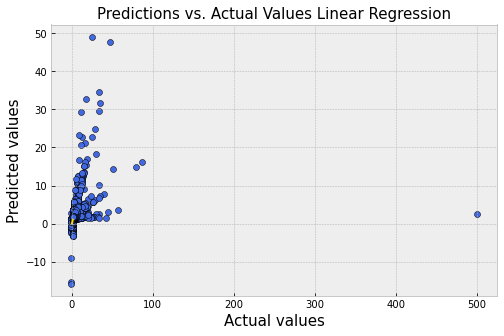

In [22]:
# Plot the predictions against the actual result
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_te_pred, color='royalblue', edgecolor='k')

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='gold')

# Label 
plt.title('Predictions vs. Actual Values Linear Regression', fontsize=15)
plt.xlabel('Actual values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)

# Linear Regression with Statsmodel

In [23]:
# Create constants for X train and test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [24]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model
rModel2_results = rModel2.fit()

In [25]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           item_cnt_day   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                 2.214e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:43:08   Log-Likelihood:            -4.8714e+06
No. Observations:             2381713   AIC:                         9.743e+06
Df Residuals:                 2381665   BIC:                         9.744e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              9.54e-07   3.87e-08     24.642      0.000    8.78e-07    1.03e-06
date_block_num      -0.0037      0.000    -20.925      0.000      -0.004      -0.003
shop_id              0.0081      0.001     12.572      0.000       0.007       0.009
item_id           1.084e-05   2.62e-07     41.433      0.000    1.03e-05    1.14e-05
item_price          -0.0003   1.35e-06   -254.809      0.000      -0.000      -0.000
day                  0.0004      0.000      2.874      0.004       0.000       0.001
month                0.0101      0.001     11.247      0.000       0.008       0.012
year                 0.0008   1.25e-05     61.474      0.000       0.001       0.001
week                -0.0009      0.000     -4.350      0.000      -0.001      -0.000
weekday              0.0014      0.001      2.217      0.027       0.000       0.003
sales                0.0002   2.27e-07    992.953      0.000       0.000       0.000
item_category_id    -0.0112      0.000    -36.359      0.000      -0.012      -0.011
first_sale_date      0.0051      0.000     26.578      0.000       0.005       0.005
Адыгея               0.1581      0.022      7.247      0.000       0.115       0.201
Балашиха             0.1393      0.021      6.534      0.000       0.098       0.181
Волжский             0.1639      0.020      8.318      0.000       0.125       0.203
Вологда              0.1259      0.019      6.569      0.000       0.088       0.163
Воронеж              0.1746      0.017     10.551      0.000       0.142       0.207
Жуковский            0.1045      0.018      5.726      0.000       0.069       0.140
Интернет-магазин     0.5329      0.016     33.855      0.000       0.502       0.564
Казань               0.1611      0.014     11.127      0.000       0.133       0.190
Калуга               0.1331      0.013     10.465      0.000       0.108       0.158
Коломна              0.0656      0.012      5.250      0.000       0.041       0.090
Красноярск           0.0970      0.012      8.419      0.000       0.074       0.120
Курск                0.0494      0.011      4.664      0.000       0.029       0.070
Москва               0.1040      0.004     28.736      0.000       0.097       0.111
Н.Новгород          -0.0648      0.008     -8.226      0.000      -0.080      -0.049
Новосибирск         -0.0712      0.010     -7.014      0.000      -0.091      -0.051
Омск                -0.1228      0.010    -12.433      0.000      -0.142      -0.103
РостовНаДону        -0.1125      0.010    -11.348      0.000      -0.132      -0.093
СПб                 -0.0203      0.009     -2.172      0.030      -0.039      -0.002
Самара              -0.1721      0.011    -15.308      0.000      -0.194      -0.150
Сергиев             -0.1415      0.012    -11.518      0.000      -0.166      -0.117
Сургут              -0.

# Decision Tree 

In [39]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_day'], axis=1)
y_train = data[data.date_block_num < 33]['item_cnt_day']
X_test = data[data.date_block_num == 33].drop(['item_cnt_day'], axis=1)
y_test = data[data.date_block_num == 33]['item_cnt_day']

In [40]:
from sklearn.tree import DecisionTreeRegressor
from random import randint
from sklearn.model_selection import RandomizedSearchCV

# Inspect hyperparameters; choose the ones to tune

# Instantiate
dt = DecisionTreeRegressor()

# Define the grid hyperparameters
param_dist = {'max_depth': [20, 30, 40],
              'min_samples_leaf': [0.01, 0.04, 0.05]}

# Instantiate a k-fold CV grid search object
dt_cv = GridSearchCV(dt, param_dist, cv=3)

# Fit model - train
dt_cv.fit(X_train, y_train)

# Predict
y_pred = dt_cv.predict(X_test)

# Extract best hyperparameters
# Extract best cv score
print("Tuned Decision Tree Parameters: {}".format(dt_cv.best_params_))

# Extract best model
best_model = dt_cv.best_estimator_


Tuned Decision Tree Parameters: {'max_depth': 20, 'min_samples_leaf': 0.01}


In [41]:
# MAE
mae_tr_dt = mean_absolute_error(y_train, y_tr_pred).round(4)
mae_te_dt = mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
mse_tr_dt = mean_squared_error(y_train, y_tr_pred).round(4)
mse_te_dt = mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
rmse_tr_dt = mean_squared_error(y_train, y_tr_pred, squared=False).round(4)
rmse_te_dt = mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
r2_tr_dt = r2_score(y_train, y_tr_pred).round(4)
r2_te_dt = r2_score(y_test, y_te_pred).round(4)


print ('Mean Absolute Error - train, test: ' + str(mae_tr_dt), str(mae_te_dt))
print ('Mean Squared Error - train, test: ' + str(mse_tr_dt), str(mse_te_dt))
print ('Root Mean Squared Error - train, test: ' + str(rmse_tr_dt), str(rmse_te_dt))
print ('R-square - train, test: ' + str(r2_tr_dt), str(r2_te_dt))

Mean Absolute Error - train, test: 0.3595 0.3638
Mean Squared Error - train, test: 3.5002 6.122
Root Mean Squared Error - train, test: 1.8709 2.4743
R-square - train, test: 0.3041 0.0844


Text(0, 0.5, 'Predicted values')

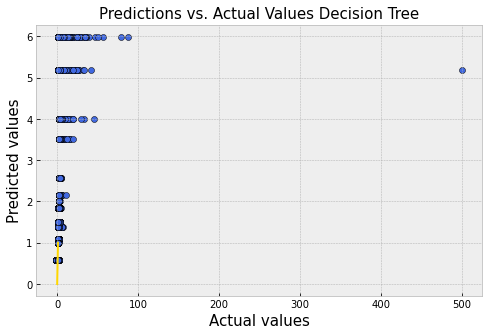

In [42]:
# Plot the predictions against the actual result
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='royalblue', edgecolor='k')

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='gold')

# Label 
plt.title("Predictions vs. Actual Values Decision Tree", fontsize=15)
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted values", fontsize=15)

## Random Forest

In [43]:
# Import RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 
rf = RandomForestRegressor(random_state = SEED)

# Print out hyperparameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [45]:
# Define hyperparameters
params_rf = {
        'n_estimators':[100, 350, 500],
        'max_features':['log2', 'auto', 'sqrt'],
        'min_samples_leaf':[0.01, 2, 10]}

# Instantiate a k-fold CV grid search object
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Fit train model
grid_rf.fit(X_train, y_train)
    
# Extract best hyperparameters
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best model
best_model = grid_rf.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

In [ ]:
# Make predictions
y_te_pred = best_model.predict(X_test)
y_tr_pred = best_model.predict(X_train)

# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)
# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)
#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

In [ ]:
# RandomForestRegressor() with a random state of 42
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=SEED)
)

# 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)

# R2
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

#np.mean(rf_cv_scores), np.std(rf_cv_scores)

In [ ]:
# TUNING PARAMETERS
n_est = [100, 200, 300]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]
}
grid_params

# Call GridSearchCV with the random forest pipeline
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

# Fit train model
rf_grid_cv.fit(X_train, y_train)

# Best parameters
rf_grid_cv.best_params_

# Extract best model
best_model_rf = rf_grid_cv.best_estimator_

In [ ]:
# Make predictions
y_te_pred = best_model_rf.predict(X_test)
y_tr_pred = best_model_rf.predict(X_train)

# MAE
mae_tr_rf = mean_absolute_error(y_train, y_tr_pred).round(4)
mae_te_rf = mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
mse_tr_rf = mean_squared_error(y_train, y_tr_pred).round(4)
mse_te_rf = mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
rmse_tr_rf = mean_squared_error(y_train, y_tr_pred, squared=False).round(4)
rmse_te_rf = mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
r2_tr_rf = r2_score(y_train, y_tr_pred).round(4)
r2_te_rf = r2_score(y_test, y_te_pred).round(4)

print ('Mean Absolute Error - train, test: ' + str(mae_tr_rf), str(mae_te_rf))
print ('Mean Squared Error - train, test: ' + str(mse_tr_rf), str(mse_te_rf))
print ('Root Mean Squared Error - train, test: ' + str(rmse_tr_rf), str(rmse_te_rf))
print ('R-square - train, test: ' + str(r2_tr_rf), str(r2_te_rf))

In [ ]:
# Plot the predictions against the actual result
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_te_pred, color='royalblue', edgecolor='k')

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='gold')

# Label 
plt.title("Predictions vs. Actual Values Random Forest", fontsize=15)
plt.xlabel("Actual values", fontsize=15)
plt.ylabel("Predicted values", fontsize=15)